In [1]:
from CFT import *
from Data import *
import math
from IPython.display import display, Math

# Testing crossing symmetry in Liouville theory

The $s$-channel decomposition of a four-point function is 
$$
\left\langle \prod_{i=1}^4 V_{\Delta_i}(z_i) \right\rangle = \sum_\Delta C_{\Delta_1, \Delta_2, \Delta} C_{\Delta_3, \Delta_4, \Delta} \mathcal{G}^{(s)}_\Delta(\Delta_i|z_i)
$$
We want to compare this with the $t$-channel decomposition of the same quantity,
$$
 \left\langle \prod_{i=1}^4 V_{\Delta_i}(z_i) \right\rangle = \sum_\Delta C_{\Delta_2, \Delta_3, \Delta} C_{\Delta_1, \Delta_4, \Delta} \mathcal{G}^{(t)}_\Delta(\Delta_i|z_i)
$$

## Central charge $c > 25$

We will choose an arbitrary value of the central charge by setting
$$
b = \sqrt{3} - 1
$$
We choose arbitrary conformal dimensions by setting
$$
P_i = [1.3, 1.01, .45, .22]
$$

In [2]:
b0 = math.sqrt(3) - 1

charge = Charge('b', b0)

c = float(charge.get('c'))

display(Math(('c_0=' + '{:.2f}'.format(c))))

Ps = [1.3, 1.01, .45, .22]

Deltas = list(map(lambda x: float('{:.3f}'.format(x)), 
             [float(Dimension('P', P, charge).get('Delta')) for P in Ps]))

display(Math(r'\Delta_i =' + str(Deltas)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Let us compute the Liouville four-point function with different truncation levels for the Zamolodchikov recursion.

In [3]:
data0 = Data(theory = 'Liouville', b = b0, Ps = Ps, Nmax = [0, 2, 4, 6], Pcutoff = 3, spline = 60)

In [4]:
Table(data0, digits = 3).display()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## Other values of the central charge

We now consider central charges $c_1 = 8.34 \in (1, 25)$ and $c_2 = 2 + 3i$.

In [5]:
c1 = 8.34

c2 = 2 + 3*1j

charges = [Charge('c', c) for c in [c1, c2]]

bs = [complex(charge.get('b')) for charge in charges]

datas = [Data(theory = 'Liouville', b = b, Ps = Ps, Nmax = [0, 2, 4, 6], 
              Pcutoff = 3, spline = 60) for b in bs]

In [6]:
display(Math('c_1 = ' + str(c1)))

Table(datas[0], digits = 4).display()

display(Math('c_2 = ' + str(c2).replace('(', '').replace(')', '').replace('j', 'i')))

Table(datas[1], digits = 6).display()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

# Liouville theory with $c < 1$

Let us consider $c_3 = -1.4645$.

In [7]:
c3 = -1.4645

b3 = float(Charge('c', c3).get('beta'))

Ps = [1.3, 1.01, .45, .22]

data3 = Data(theory = 'Analytic', beta = b3, Ps = Ps, Ucutoff = 12,
             Nmax = [0, 2, 4, 6, 8], Pcutoff = 3, spline = 60)

In [8]:
Table(data3).display()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

# Dependence on $x$

Let us come back to Liouville theory with $c>25$ and draw the dependence on $x$.

In [9]:
N = 20

xs = [i*1.0/N for i in range(1, N)]

Ps = [1.3, 1.01, .45, .22]

Pcutoff = 3

spline = 30

b4 = 1.3579

data4 = Data(spline = spline, x = xs, b = b4, Ps = Ps, Pcutoff = Pcutoff, 
              Nmax = [0, 2, 4], reduced = True)

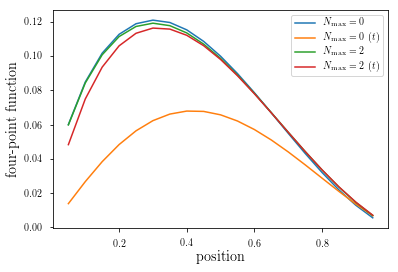

In [10]:
graph = Graph(data4, Nmax = [0, 2])

graph.show()